# **Experimenting on Fish**

We showcase various experiments on simulated zebrafish.

# Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import sys
sys.path.append('../') # assumes notebook started from brightfish/notebooks
import brightfish
import brightfish.environment as environment
import brightfish.fish as fish

# Sinusoidal Environment

First, we'll need to create an environment for the fish to operate in. We'll use the simple 1D sinusoidal environment for now:

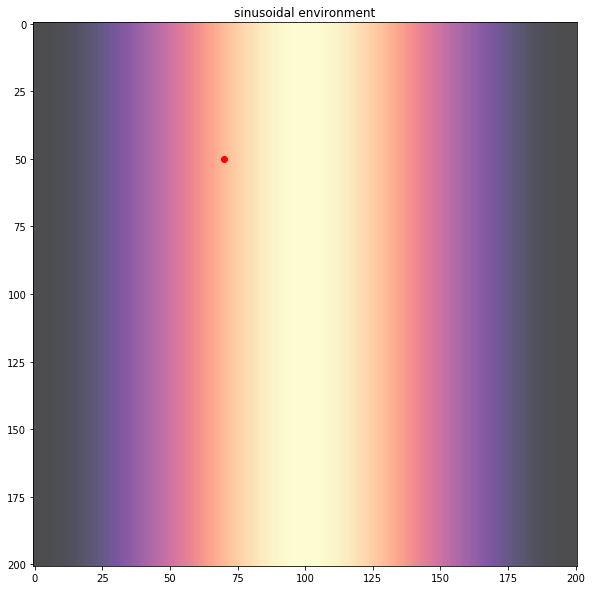

In [2]:
e = environment.SinusoidalGradient((201, 201), static=True)
fig = plt.figure(figsize=(10, 10))
plt.imshow(e.stage, cmap='magma', alpha=0.7)
plt.scatter([70], [50], c='r')
plt.title("sinusoidal environment")
plt.show()

Next, we'll have to create a (binocular) fish:

In [3]:
f = fish.BinocularFish(np.pi/4, [50, 70], turning_cap=0.5, turning_rate=5e-2, p_move=0.2, move_distance=5.0)
print(f)

BinocularFish: heading: 0.79 position: [50, 70] set_point: 0.50 p_left: 0.33 p_right: 0.33


Now that we have a fish, we can allow the fish to simulate some time in the environment and observe the change in parameters:

In [4]:
timesteps = 1000
params = f.run(e, timesteps)

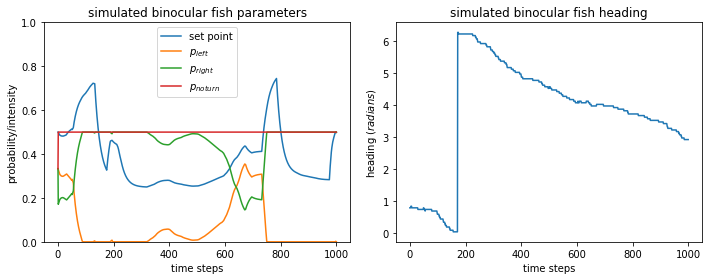

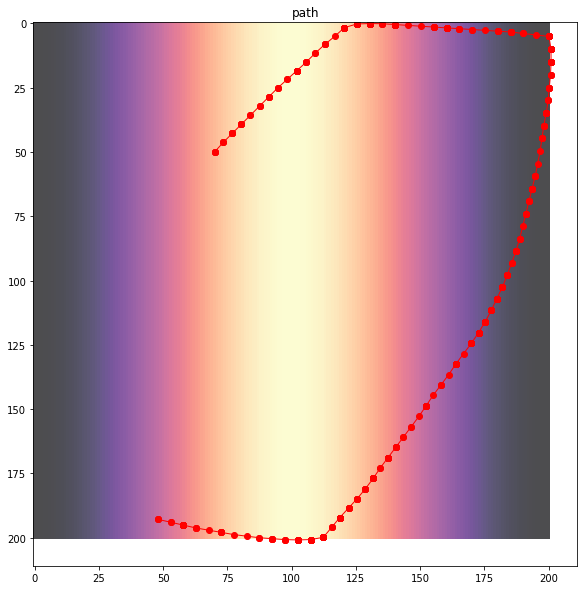

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(np.arange(timesteps+1), params[:,3], label="set point")
axs[0].plot(np.arange(timesteps+1), params[:,4], label=r"$p_{left}$")
axs[0].plot(np.arange(timesteps+1), params[:,5], label=r"$p_{right}$")
axs[0].plot(np.arange(timesteps+1), params[:,6], label=r"$p_{noturn}$")
axs[0].set_ylim(0, 1.0)
axs[0].set_title("simulated binocular fish parameters")
axs[0].set_xlabel("time steps")
axs[0].set_ylabel("probability/intensity")
axs[0].legend()
axs[1].plot(np.arange(timesteps+1), params[:,0], label="heading")
axs[1].set_title("simulated binocular fish heading")
axs[1].set_xlabel("time steps")
axs[1].set_ylabel(r"heading ($radians$)")
fig.tight_layout()
plt.show()

fig = plt.figure(figsize=(10, 10))
plt.imshow(e.stage, cmap='magma', alpha=0.7)
plt.plot(params[:,2], params[:,1], marker='o', color='r', linewidth=1.0)
plt.title("path")
plt.show()

We can also create a monocular fish and observe the difference in behavior:

In [6]:
f = fish.MonocularFish(np.pi/4, [50, 70], turning_cap=0.5, turning_rate=5e-2, p_move=0.2, move_distance=5.0)
print(f)

MonocularFish: heading: 0.79 position: [50, 70] set_point_left: 0.50 set_point_right: 0.50 p_left: 0.33 p_right: 0.33


In [7]:
timesteps = 1000
params = f.run(e, timesteps)

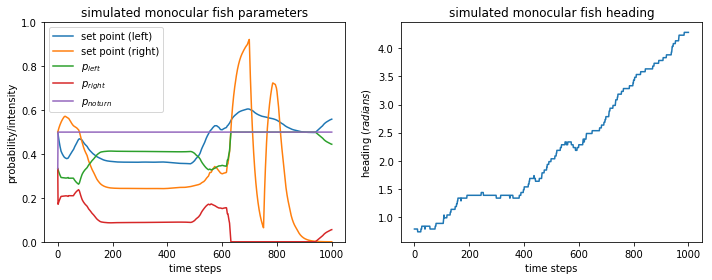

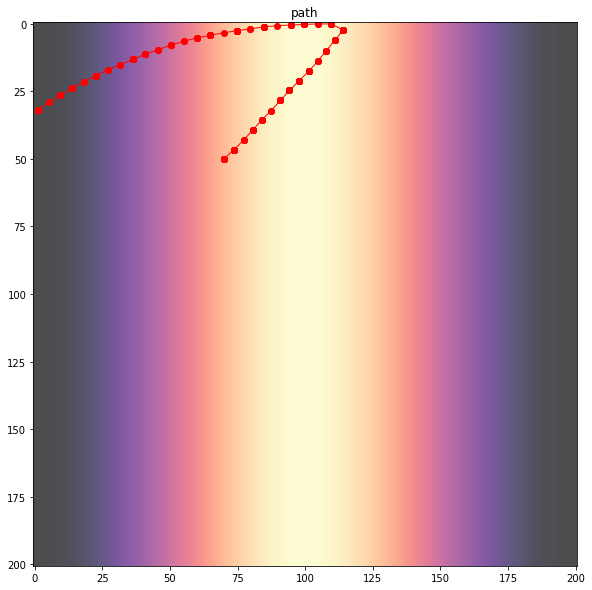

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(np.arange(timesteps+1), params[:,3], label="set point (left)")
axs[0].plot(np.arange(timesteps+1), params[:,4], label="set point (right)")
axs[0].plot(np.arange(timesteps+1), params[:,5], label=r"$p_{left}$")
axs[0].plot(np.arange(timesteps+1), params[:,6], label=r"$p_{right}$")
axs[0].plot(np.arange(timesteps+1), params[:,7], label=r"$p_{noturn}$")
axs[0].set_ylim(0, 1.0)
axs[0].set_title("simulated monocular fish parameters")
axs[0].set_xlabel("time steps")
axs[0].set_ylabel("probability/intensity")
axs[0].legend()
axs[1].plot(np.arange(timesteps+1), params[:,0], label="heading")
axs[1].set_title("simulated monocular fish heading")
axs[1].set_xlabel("time steps")
axs[1].set_ylabel(r"heading ($radians$)")
fig.tight_layout()
plt.show()

fig = plt.figure(figsize=(10, 10))
plt.imshow(e.stage, cmap='magma', alpha=0.7)
plt.plot(params[:,2], params[:,1], marker='o', color='r', linewidth=1.0)
plt.title("path")
plt.show()